In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('training_set_features.csv')
test = pd.read_csv('training_set_labels.csv')

train = train.drop(columns=['rent_or_own', 'employment_occupation', 'employment_industry', 'health_insurance'])

In [3]:
[i for i in train.columns if train[i].dtype == 'object']

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'employment_status',
 'hhs_geo_region',
 'census_msa']

In [4]:
train.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [5]:
cleanup = { 
                "age_group": {"18 - 34 Years": 0, "35 - 44 Years": 1, "45 - 54 Years" : 2, "55 - 64 Years" : 3, "65+ Years" : 4},
                "income_poverty" : {'Below Poverty' : 0, '<= $75,000, Above Poverty' : 1, '> $75,000' : 2},
                "education" : {'< 12 Years' : 0, '12 Years' : 1, 'College Graduate' : 2, 'Some College' : 3}
}
train = train.replace(cleanup)

C:\Users\dell\AppData\Local\Temp\ipykernel_39772\680447775.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train = train.replace(cleanup)


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

cat_cols = ['opinion_xyz_vacc_effective', 'opinion_xyz_risk',
            'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
            'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

imp = SimpleImputer(strategy='most_frequent')
for name, group in train.groupby(['census_msa', 'hhs_geo_region']):
    mask = (train['census_msa'] == name[0]) & (train['hhs_geo_region'] == name[1])
    train.loc[mask, cat_cols] = imp.fit_transform(group[cat_cols])

cat_cols = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home']

for name, group in train.groupby(['age_group', 'race', 'sex', 'census_msa', 'hhs_geo_region']):
    mask =  (train['age_group'] == name[0]) & (train['race'] == name[1]) &(train['sex'] == name[2])& (train['census_msa'] == name[3]) & (train['hhs_geo_region'] == name[4])
    
    train.loc[mask, cat_cols] = imp.fit_transform(group[cat_cols])

cat_cols = ['chronic_med_condition', 'education']
for name, group in train.groupby(['age_group', 'sex', 'census_msa', 'hhs_geo_region']):
    mask =  (train['age_group'] == name[0]) & (train['sex'] == name[1])& (train['census_msa'] == name[2]) & (train['hhs_geo_region'] == name[3])
    train.loc[mask, cat_cols] = imp.fit_transform(group[cat_cols])

In [7]:
imp1 = SimpleImputer(strategy='median')

num_cols = ['household_adults', 'household_children']
for name, group in train.groupby(['race', 'census_msa', 'hhs_geo_region']):
    mask = (train['race'] == name[0]) & (train['census_msa'] == name[1]) & (train['hhs_geo_region'] == name[2])
    train.loc[mask, num_cols] = imp1.fit_transform(group[num_cols])

In [8]:
import math
cat_cols = ['xyz_concern', 'xyz_knowledge']

for name, group in train.groupby(['census_msa', 'hhs_geo_region']):
    mask = (train['census_msa'] == name[0]) & (train['hhs_geo_region'] == name[1])
    train.loc[mask, cat_cols] = imp.fit_transform(group[cat_cols])

cat_cols = ['marital_status', 'employment_status', 'income_poverty']

for name, group in train.groupby(['sex', 'race', 'age_group']):
    mask = (train['sex'] == name[0]) & (train['race'] == name[1]) & (train['age_group'] == name[2])
    train.loc[mask, cat_cols] = imp.fit_transform(group[cat_cols])

cat_cols = ['doctor_recc_seasonal', 'doctor_recc_xyz']

for name, group in train.groupby(['age_group', 'chronic_med_condition']):
    mask = (train['age_group'] == name[0]) & (train['chronic_med_condition'] == name[1])
    train.loc[mask, cat_cols] = imp.fit_transform(group[cat_cols])


def f1(cols):
    b = cols.iloc[0]
    b1 = cols.iloc[1]
    b2 = cols.iloc[2]
    b3 = cols.iloc[3]
    b4 = cols.iloc[4]

    if math.isnan(b) :
        sum = (b1 == 0) + (b2 == 0) + (b3 == 0) + (b4 == 0)
        if sum > 2 :
            return 0
        else :
            return 1
    else :
        return b

train['behavioral_face_mask'] = train[['behavioral_face_mask', 'behavioral_avoidance', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home']].apply(f1, axis=1)
train['behavioral_touch_face'] = train[['behavioral_touch_face', 'behavioral_avoidance', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home']].apply(f1, axis=1)

filter_ = train.isna().sum(axis=1) == 0
train = train[filter_]
test = test[filter_]

<Axes: >

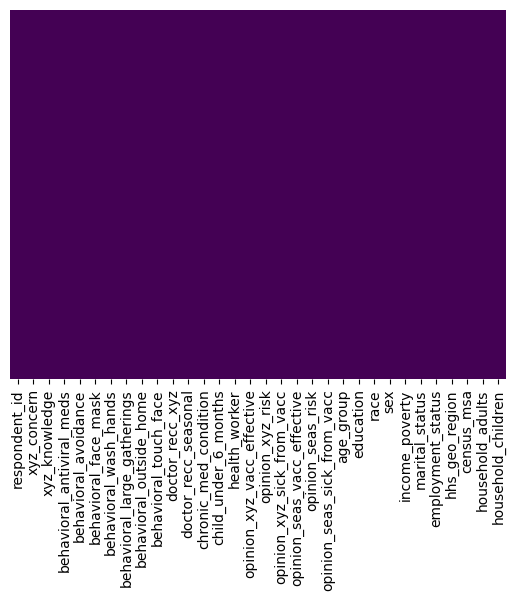

In [9]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
sum(train.isna().sum(axis=1) > 0)

0

In [ ]:
train["census_msa"] = train["census_msa"].astype('category')
train["hhs_geo_region"] = train["hhs_geo_region"].astype('category')

train.loc["census_msa"] = train["census_msa"].cat.codes
train.loc["hhs_geo_region"] = train["hhs_geo_region"].cat.codes

In [23]:
train.dtypes

respondent_id                              int64
xyz_concern                              float64
xyz_knowledge                            float64
behavioral_antiviral_meds                float64
behavioral_avoidance                     float64
behavioral_face_mask                     float64
behavioral_wash_hands                    float64
behavioral_large_gatherings              float64
behavioral_outside_home                  float64
behavioral_touch_face                    float64
doctor_recc_xyz                          float64
doctor_recc_seasonal                     float64
chronic_med_condition                    float64
child_under_6_months                     float64
health_worker                            float64
opinion_xyz_vacc_effective               float64
opinion_xyz_risk                         float64
opinion_xyz_sick_from_vacc               float64
opinion_seas_vacc_effective              float64
opinion_seas_risk                        float64
opinion_seas_sick_fr

In [12]:
train = pd.get_dummies(train, columns=["marital_status"])
train = pd.get_dummies(train, columns=["employment_status"])
train = pd.get_dummies(train, columns=["sex"])
train = pd.get_dummies(train, columns=["race"])

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [14]:
test.columns

Index(['respondent_id', 'xyz_vaccine', 'seasonal_vaccine'], dtype='object')

In [15]:
X = train.copy()   # replace by train after removing null values
X = X.drop(columns=['doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc'])
y = test['xyz_vaccine'].copy()    # replace with the labels (test)

In [17]:
X.dtypes

respondent_id                             int64
xyz_concern                             float64
xyz_knowledge                           float64
behavioral_antiviral_meds               float64
behavioral_avoidance                    float64
behavioral_face_mask                    float64
behavioral_wash_hands                   float64
behavioral_large_gatherings             float64
behavioral_outside_home                 float64
behavioral_touch_face                   float64
doctor_recc_xyz                         float64
chronic_med_condition                   float64
child_under_6_months                    float64
health_worker                           float64
opinion_xyz_vacc_effective              float64
opinion_xyz_risk                        float64
opinion_xyz_sick_from_vacc              float64
age_group                                 int64
education                               float64
income_poverty                          float64
hhs_geo_region                          

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a parameter grid for alpha
param_grid = {'alpha': np.logspace(-4, 1, 50)}

# Initialize Lasso
lasso = Lasso(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to find the best alpha
grid_search.fit(X_train_scaled, y_train)

# Best alpha found
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha found: {best_alpha}")

# Fit Lasso with the best alpha on the full dataset
lasso_best = Lasso(alpha=best_alpha, random_state=42)
lasso_best.fit(X_train_scaled, y_train)

# Predict and evaluate Lasso with best alpha
y_pred_best = lasso_best.predict(X_test_scaled)
print(f"Lasso Regression with best alpha MSE: {mean_squared_error(y_test, y_pred_best)}")

# Initialize RFE with Lasso using the best alpha
rfe = RFE(estimator=lasso_best, n_features_to_select=15, step=1)
rfe.fit(X_train_scaled, y_train)

# Transform the data
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# Fit Lasso with the best alpha on the reduced features
lasso_rfe_best = Lasso(alpha=best_alpha, random_state=42)
lasso_rfe_best.fit(X_train_rfe, y_train)

# Predict and evaluate Lasso with RFE and best alpha
y_pred_rfe_best = lasso_rfe_best.predict(X_test_rfe)
print(f"Lasso with RFE and best alpha MSE: {mean_squared_error(y_test, y_pred_rfe_best)}")

# Get selected feature names
selected_features_xyz = X.columns[rfe.support_]
print(f"Selected features: {selected_features_xyz}")


ValueError: could not convert string to float: 'lrircsnp'

In [ ]:
X1 = train.copy()   # replace by train after removing null values
X1 = X1.drop(columns=['xyz_knowledge','xyz_concern','doctor_recc_xyz', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc'])

y = test['seasonal_vaccine'].copy()    # replace with the labels (test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a parameter grid for alpha
param_grid = {'alpha': np.logspace(-4, 1, 50)}

# Initialize Lasso
lasso = Lasso(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to find the best alpha
grid_search.fit(X_train_scaled, y_train)

# Best alpha found
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha found: {best_alpha}")

# Fit Lasso with the best alpha on the full dataset
lasso_best = Lasso(alpha=best_alpha, random_state=42)
lasso_best.fit(X_train_scaled, y_train)

# Predict and evaluate Lasso with best alpha
y_pred_best = lasso_best.predict(X_test_scaled)
print(f"Lasso Regression with best alpha MSE: {mean_squared_error(y_test, y_pred_best)}")

# Initialize RFE with Lasso using the best alpha
rfe = RFE(estimator=lasso_best, n_features_to_select=15, step=1)
rfe.fit(X_train_scaled, y_train)

# Transform the data
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# Fit Lasso with the best alpha on the reduced features
lasso_rfe_best = Lasso(alpha=best_alpha, random_state=42)
lasso_rfe_best.fit(X_train_rfe, y_train)

# Predict and evaluate Lasso with RFE and best alpha
y_pred_rfe_best = lasso_rfe_best.predict(X_test_rfe)
print(f"Lasso with RFE and best alpha MSE: {mean_squared_error(y_test, y_pred_rfe_best)}")

# Get selected feature names
selected_features_seas = X1.columns[rfe.support_]
print(f"Selected features: {selected_features_seas}")

In [ ]:
X = X.loc[:, selected_features_xyz]
X1 = X1.loc[:, selected_features_seas]
X_test = pd.read_csv('test_set_features.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss

# Load and prepare the dataset
y = test['xyz_vaccine'].copy()
# Split the data
X_train = X
y_train = y

# Standardize the data (for SVM)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize models
# Multinomial Naive Bayes expects positive feature values
# To make the data compatible, we'll use MinMax scaling here instead of standard scaling
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train_mm = scaler_minmax.fit_transform(X_train)
X_test_mm = scaler_minmax.transform(X_test)

nb = MultinomialNB()
# svc = SVC(probability=True, random_state=42)  # SVM with probability estimates

# Fit models
nb.fit(X_train_mm, y_train)
# svc.fit(X_train_scaled, y_train)

X_test_to_use = X_test_mm
y_proba1 = nb.predict_proba(X_test_to_use)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss

# Load and prepare the dataset
y = test['seasonal_vaccine'].copy()
# Split the data
X_train = X1
y_train = y

# Standardize the data (for SVM)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize models
# Multinomial Naive Bayes expects positive feature values
# To make the data compatible, we'll use MinMax scaling here instead of standard scaling
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train_mm = scaler_minmax.fit_transform(X_train)
X_test_mm = scaler_minmax.transform(X_test)

nb = MultinomialNB()
# svc = SVC(probability=True, random_state=42)  # SVM with probability estimates

# Fit models
nb.fit(X_train_mm, y_train)
# svc.fit(X_train_scaled, y_train)

X_test_to_use = X_test_mm
y_proba2 = nb.predict_proba(X_test_to_use)

In [ ]:
ids = X_test['respondent_id']

# Create a DataFrame with `id` and predicted values
results_df = pd.DataFrame({
    'id': ids,
    'xyz_vaccine': y_proba1,
    'seasonal_vaccine': y_proba2
})

# Write to CSV
results_df.to_csv('predictions.csv', index=False)

print(results_df)